# Introduction

This project is for Capgemini in order to continue the selection process.

The second task is to work with a time series dataset that I can chose and to predict future values.

I've chosen here a dataset on kaggle :

https://www.kaggle.com/datasets/decide-soluciones/air-quality-madrid

This dataset is about the air quality in Madrid, from 2001 to 2018.

This is by the way my first project dealing with time series

# Load datas

In [1]:
import pandas as pd

In [2]:
stations = pd.read_csv('data\stations.csv')
print("Stations informations:")
print(stations.head())

Stations informations:
         id                 name  \
0  28079004       Pza. de España   
1  28079008     Escuelas Aguirre   
2  28079011  Avda. Ramón y Cajal   
3  28079016         Arturo Soria   
4  28079017           Villaverde   

                                             address       lon        lat  \
0                                    Plaza de España -3.712247  40.423853   
1                    Entre C/ Alcalá y C/ O’ Donell  -3.682319  40.421564   
2   Avda. Ramón y Cajal  esq. C/ Príncipe de Vergara -3.677356  40.451475   
3  C/ Arturo Soria  esq. C/  Vizconde de los Asilos  -3.639233  40.440047   
4                                  C/. Juan Peñalver -3.713322  40.347139   

   elevation  
0        635  
1        670  
2        708  
3        693  
4        604  


In [3]:
import folium

m = folium.Map(location=[40.416775, -3.703790], zoom_start=12)

for index, row in stations.iterrows():
    folium.Marker([row['lat'], row['lon']], popup=row['name']).add_to(m)

m

I was just curious to see where are the stations... Knowing the big number of station, I'll focus on the one called Plaza de España

In [5]:
#Load 2018 data to check how they look like
measures_2018 = pd.read_csv('data\csvs_per_year\csvs_per_year\madrid_2018.csv')
print("\nMeasures from 2018 :")
print(measures_2018.head())
print(measures_2018.tail())


Measures from 2018 :
                  date  BEN   CH4   CO  EBE  NMHC   NO  NO_2   NOx   O_3  \
0  2018-03-01 01:00:00  NaN   NaN  0.3  NaN   NaN  1.0  29.0  31.0   NaN   
1  2018-03-01 01:00:00  0.5  1.39  0.3  0.2  0.02  6.0  40.0  49.0  52.0   
2  2018-03-01 01:00:00  0.4   NaN  NaN  0.2   NaN  4.0  41.0  47.0   NaN   
3  2018-03-01 01:00:00  NaN   NaN  0.3  NaN   NaN  1.0  35.0  37.0  54.0   
4  2018-03-01 01:00:00  NaN   NaN  NaN  NaN   NaN  1.0  27.0  29.0  49.0   

   PM10  PM25  SO_2   TCH  TOL   station  
0   NaN   NaN   2.0   NaN  NaN  28079004  
1   5.0   4.0   3.0  1.41  0.8  28079008  
2   NaN   NaN   NaN   NaN  1.1  28079011  
3   NaN   NaN   NaN   NaN  NaN  28079016  
4   NaN   NaN   3.0   NaN  NaN  28079017  
                      date  BEN  CH4   CO  EBE  NMHC     NO   NO_2    NOx  \
69091  2018-02-01 00:00:00  NaN  NaN  0.5  NaN   NaN   66.0   91.0  192.0   
69092  2018-02-01 00:00:00  NaN  NaN  0.7  NaN   NaN   87.0  107.0  241.0   
69093  2018-02-01 00:00:00  NaN 

In [6]:
measures_2018.dropna().describe()

,BEN,CH4,CO,EBE,NMHC,NO,NO_2,NOx,O_3,PM10,PM25,SO_2,TCH,TOL,station
count,4562.00000,4562.000000,4562.000000,4562.000000,4562.000000,4562.000000,4562.000000,4562.000000,4562.000000,4562.000000,4562.000000,4562.000000,4562.000000,4562.000000,4.562000e+03
mean,0.69349,1.329163,0.330579,0.286782,0.056773,21.742218,44.152126,77.494739,41.279702,10.656291,7.126480,4.080447,1.385296,1.882288,2.807901e+07
std,0.46832,0.214399,0.161489,0.354442,0.037711,35.539531,30.234015,79.218558,26.298770,8.734093,5.965405,2.515964,0.227030,2.184735,7.829190e+00
min,0.10000,0.020000,0.100000,0.100000,0.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,1.000000,0.030000,0.100000,2.807901e+07
25%,0.40000,1.120000,0.200000,0.100000,0.030000,1.000000,20.000000,24.000000,18.000000,4.000000,3.000000,3.000000,1.180000,0.500000,2.807901e+07
50%,0.60000,1.390000,0.300000,0.200000,0.050000,9.000000,41.000000,56.000000,42.000000,8.000000,5.000000,4.000000,1.420000,1.200000,2.807901e+07
75%,0.90000,1.420000,0.400000,0.300000,0.070000,27.000000,64.000000,106.000000,63.000000,15.000000,10.000000,5.000000,1.480000,2.500000,2.807902e+07
max,6.60000,3.920000,2.000000,7.400000,0.490000,431.000000,184.000000,844.000000,113.000000,64.000000,42.000000,22.000000,4.120000,26.700001,2.807902e+07


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

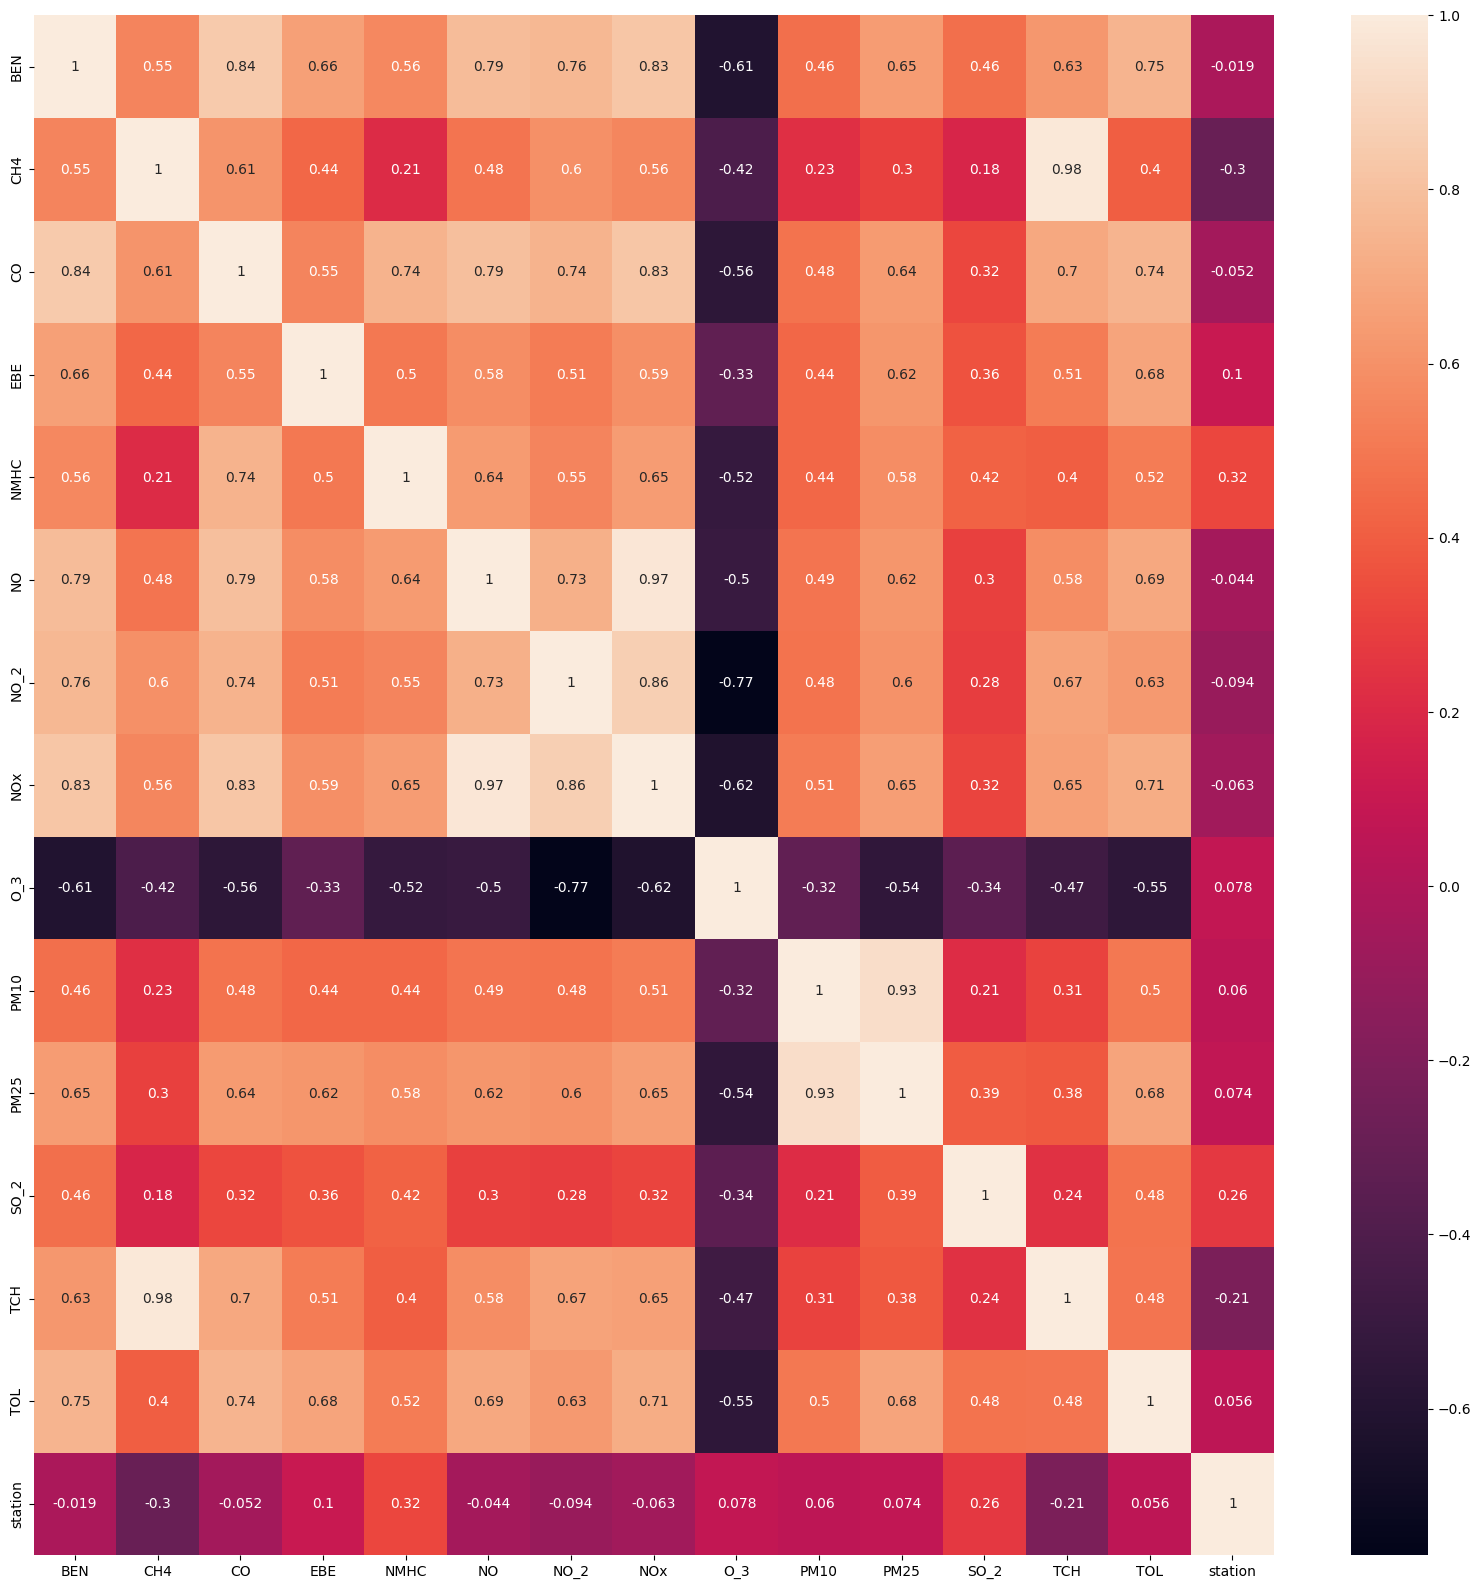

In [9]:
#delete date columns for correlation matrix
measures_2018_without_dates = measures_2018.drop(columns=['date'])

# heatmap
plt.figure(figsize=(20,20))
sns.heatmap(measures_2018_without_dates.corr(), annot=True)
plt.show()

In [10]:
import pandas as pd

# Load h5
with pd.HDFStore('data/madrid.h5', 'r') as hdf:

    keys = hdf.keys()
    print("\nClés dans le fichier HDF5 :")
    for key in keys:
        print(key)


Clés dans le fichier HDF5 :
/28079001
/28079003
/28079004
/28079006
/28079007
/28079008
/28079009
/28079011
/28079012
/28079014
/28079015
/28079016
/28079017
/28079018
/28079019
/28079021
/28079022
/28079023
/28079024
/28079025
/28079026
/28079027
/28079035
/28079036
/28079038
/28079039
/28079040
/28079047
/28079048
/28079049
/28079050
/28079054
/28079055
/28079056
/28079057
/28079058
/28079059
/28079060
/28079099
/master


Okay so each CSV_per_year contain information with a station_id, and the madrid.h5 file contain key of these stations.

In [11]:
import pandas as pd

# Load h5
with pd.HDFStore('data/madrid.h5', 'r') as hdf:
    # Lire le groupe 'master'
    master_df = hdf.get('master')
    
# print 'master'
print("\n'master' :")
print(master_df.head())


'master' :
         id                 name  \
0  28079004       Pza. de España   
1  28079008     Escuelas Aguirre   
2  28079011  Avda. Ramón y Cajal   
3  28079016         Arturo Soria   
4  28079017           Villaverde   

                                             address       lon        lat  \
0                                    Plaza de España -3.712247  40.423853   
1                    Entre C/ Alcalá y C/ O’ Donell  -3.682319  40.421564   
2   Avda. Ramón y Cajal  esq. C/ Príncipe de Vergara -3.677356  40.451475   
3  C/ Arturo Soria  esq. C/  Vizconde de los Asilos  -3.639233  40.440047   
4                                  C/. Juan Peñalver -3.713322  40.347139   

   elevation  
0        635  
1        670  
2        708  
3        693  
4        604  


In [12]:
# Load'Pza. de España' data
station_data = pd.read_hdf('data/madrid.h5', key='28079035')
print(station_data.head())


                      BEN    CO   EBE   MXY  NMHC  NO       NO_2        NOx  \
date                                                                          
2001-08-01 01:00:00  1.50  0.34  1.49  4.10  0.07 NaN  56.250000  75.169998   
2001-08-01 02:00:00  0.87  0.06  0.88  2.41  0.01 NaN  29.709999  31.440001   
2001-08-01 03:00:00  0.66  0.02  0.61  1.60  0.01 NaN  22.750000  22.459999   
2001-08-01 04:00:00  0.47  0.04  0.41  1.00  0.02 NaN  31.590000  34.770000   
2001-08-01 05:00:00  0.60  0.04  0.67  1.68  0.01 NaN  30.940001  32.509998   

                      OXY        O_3        PM10   PXY  SO_2   TCH    TOL  
date                                                                       
2001-08-01 01:00:00  2.11  42.160000  100.599998  1.73  8.11  1.24  10.82  
2001-08-01 02:00:00  1.20  56.520000   56.290001  1.02  6.90  1.17   6.49  
2001-08-01 03:00:00  0.80  64.059998   36.650002  0.69  6.59  1.17   6.37  
2001-08-01 04:00:00  0.47  60.820000   25.820000  0.44  6.45  1.21

In [13]:
station_key = 28079004 #Save the key

In [14]:
station_data.shape

(115656, 15)

I'll check the data of the stations

In [15]:
madrid_stations = pd.read_csv("data\stations.csv")
madrid_stations.head()

,id,name,address,lon,lat,elevation
0,28079004,Pza. de España,Plaza de España,-3.712247,40.423853,635
1,28079008,Escuelas Aguirre,Entre C/ Alcalá y C/ O’ Donell,-3.682319,40.421564,670
2,28079011,Avda. Ramón y Cajal,Avda. Ramón y Cajal esq. C/ Príncipe de Vergara,-3.677356,40.451475,708
3,28079016,Arturo Soria,C/ Arturo Soria esq. C/ Vizconde de los Asilos,-3.639233,40.440047,693
4,28079017,Villaverde,C/. Juan Peñalver,-3.713322,40.347139,604


In [16]:
madrid_stations.shape

(24, 6)

In [17]:
madrid_stations.dropna().describe()

,id,lon,lat,elevation
count,2.400000e+01,24.000000,24.000000,24.000000
mean,2.807904e+07,-3.679019,40.434616,658.333333
std,1.799094e+01,0.049324,0.043022,38.295949
min,2.807900e+07,-3.774611,40.347139,599.000000
25%,2.807902e+07,-3.711718,40.405489,625.500000
50%,2.807904e+07,-3.687797,40.431875,661.000000
75%,2.807905e+07,-3.649968,40.465331,687.000000
max,2.807906e+07,-3.580031,40.518058,728.000000


Let's merge all the CSV

In [18]:
import glob

#Using the glob package to read all files with datatype csv contained in the folder
files = glob.glob("data/csvs_per_year/csvs_per_year**/*.csv")

# Init a list to stop all df
dfs = []

# Load all csv and add them to the df
for f in files:
    csv = pd.read_csv(f)
    dfs.append(csv)

df = pd.concat(dfs, ignore_index=True)

In [19]:
df.head()

,date,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PXY,SO_2,TCH,TOL,station,PM25,NO,CH4
0,2001-08-01 01:00:00,NaN,0.37,NaN,NaN,NaN,58.400002,87.150002,NaN,34.529999,105.000000,NaN,6.34,NaN,NaN,28079001,NaN,NaN,NaN
1,2001-08-01 01:00:00,1.5,0.34,1.49,4.1,0.07,56.250000,75.169998,2.11,42.160000,100.599998,1.73,8.11,1.24,10.82,28079035,NaN,NaN,NaN
2,2001-08-01 01:00:00,NaN,0.28,NaN,NaN,NaN,50.660000,61.380001,NaN,46.310001,100.099998,NaN,7.85,NaN,NaN,28079003,NaN,NaN,NaN
3,2001-08-01 01:00:00,NaN,0.47,NaN,NaN,NaN,69.790001,73.449997,NaN,40.650002,69.779999,NaN,6.46,NaN,NaN,28079004,NaN,NaN,NaN
4,2001-08-01 01:00:00,NaN,0.39,NaN,NaN,NaN,22.830000,24.799999,NaN,66.309998,75.180000,NaN,8.80,NaN,NaN,28079039,NaN,NaN,NaN


In [20]:
df.shape

(3808224, 19)

In [21]:
df.dtypes

date        object
BEN        float64
CO         float64
EBE        float64
MXY        float64
NMHC       float64
NO_2       float64
NOx        float64
OXY        float64
O_3        float64
PM10       float64
PXY        float64
SO_2       float64
TCH        float64
TOL        float64
station      int64
PM25       float64
NO         float64
CH4        float64
dtype: object

In [22]:
df['date'] = pd.to_datetime(df.date)

In [23]:
#Divide columns by 1000 to get the same unit
df['CO'] = df['CO']/1000
df['TCH'] = df['TCH']/1000
df['CH4'] = df['CH4']/1000
df['NMHC'] = df['NMHC']/1000

In [24]:
df.info(show_counts=True, memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3808224 entries, 0 to 3808223
Data columns (total 19 columns):
 #   Column   Non-Null Count    Dtype         
---  ------   --------------    -----         
 0   date     3808224 non-null  datetime64[ns]
 1   BEN      1041684 non-null  float64       
 2   CO       2651012 non-null  float64       
 3   EBE      1001724 non-null  float64       
 4   MXY      315415 non-null   float64       
 5   NMHC     1085312 non-null  float64       
 6   NO_2     3787050 non-null  float64       
 7   NOx      2376275 non-null  float64       
 8   OXY      315695 non-null   float64       
 9   O_3      2991732 non-null  float64       
 10  PM10     2861255 non-null  float64       
 11  PXY      315584 non-null   float64       
 12  SO_2     2775960 non-null  float64       
 13  TCH      1086441 non-null  float64       
 14  TOL      1038929 non-null  float64       
 15  station  3808224 non-null  int64         
 16  PM25     816424 non-null   float64  

In [25]:
df.isnull().sum()

date             0
BEN        2766540
CO         1157212
EBE        2806500
MXY        3492809
NMHC       2722912
NO_2         21174
NOx        1431949
OXY        3492529
O_3         816492
PM10        946969
PXY        3492640
SO_2       1032264
TCH        2721783
TOL        2769295
station          0
PM25       2991800
NO         2275827
CH4        3793374
dtype: int64

In [26]:
df_stations = df.groupby('station')
pza_esp = df_stations.get_group(28079004)
pza_esp.index = pza_esp.date
pza_esp = pza_esp.drop(['date'], axis = 1)
pza_esp.head()

,BEN,CO,EBE,MXY,NMHC,NO_2,NOx,OXY,O_3,PM10,PXY,SO_2,TCH,TOL,station,PM25,NO,CH4
date,,,,,,,,,,,,,,,,,,
2001-08-01 01:00:00,NaN,0.00047,NaN,NaN,NaN,69.790001,73.449997,NaN,40.650002,69.779999,NaN,6.46,NaN,NaN,28079004,NaN,NaN,NaN
2001-08-01 02:00:00,NaN,0.00033,NaN,NaN,NaN,64.110001,66.849998,NaN,45.230000,47.509998,NaN,6.41,NaN,NaN,28079004,NaN,NaN,NaN
2001-08-01 03:00:00,NaN,0.00027,NaN,NaN,NaN,60.349998,62.610001,NaN,49.610001,42.110001,NaN,5.88,NaN,NaN,28079004,NaN,NaN,NaN
2001-08-01 04:00:00,NaN,0.00021,NaN,NaN,NaN,48.689999,49.959999,NaN,61.830002,27.250000,NaN,5.29,NaN,NaN,28079004,NaN,NaN,NaN
2001-08-01 05:00:00,NaN,0.00018,NaN,NaN,NaN,46.189999,47.320000,NaN,62.889999,31.520000,NaN,5.31,NaN,NaN,28079004,NaN,NaN,NaN


In [27]:
pza_esp.shape

(151776, 18)

In [28]:
ratio_null = pza_esp.isnull().sum() * 100 / pza_esp.shape[0]

In [29]:
ratio_null.sort_values(ascending=False)

BEN        100.000000
OXY        100.000000
PM25       100.000000
TOL        100.000000
TCH        100.000000
PXY        100.000000
CH4        100.000000
NMHC       100.000000
MXY        100.000000
EBE        100.000000
NO          57.812829
PM10        48.427946
O_3         48.265865
NOx         39.173519
CO           0.370941
NO_2         0.331409
SO_2         0.306373
station      0.000000
dtype: float64

There is really a lot of missing values...

# Clean data

I take the decision to remove all features with more than 50% of missing values

In [30]:
pza_esp_cleaned = pza_esp.copy()

In [31]:
feature2remove = ratio_null[ratio_null > 50]
feature2remove= feature2remove.index.tolist()
feature2remove

['BEN', 'EBE', 'MXY', 'NMHC', 'OXY', 'PXY', 'TCH', 'TOL', 'PM25', 'NO', 'CH4']

In [32]:
pza_esp_cleaned = pza_esp.drop(feature2remove, axis = 1)

In [33]:
ratio_null = pza_esp_cleaned.isnull().sum() * 100 / pza_esp_cleaned.shape[0]
ratio_null

CO          0.370941
NO_2        0.331409
NOx        39.173519
O_3        48.265865
PM10       48.427946
SO_2        0.306373
station     0.000000
dtype: float64

In [34]:
pza_esp_cleaned = pza_esp_cleaned.drop(columns=['NOx', 'O_3', 'station'])

To calcul the Air Quality, I need PM10, and at least 3 among SO2, NOx, NH3, CO and O3. So let's use C0, NO2, and S02, because NOx has too many missing values. But I need to complete PM10 to make the calcul

In [35]:
pza_esp_cleaned['CO'].fillna(pza_esp_cleaned['CO'].median())
pza_esp_cleaned['NO_2'].fillna(pza_esp_cleaned['NO_2'].median())
pza_esp_cleaned['SO_2'].fillna(pza_esp_cleaned['SO_2'].median())

date
2001-08-01 01:00:00     6.46
2001-08-01 02:00:00     6.41
2001-08-01 03:00:00     5.88
2001-08-01 04:00:00     5.29
2001-08-01 05:00:00     5.31
                       ...  
2018-01-31 20:00:00    10.00
2018-01-31 21:00:00    12.00
2018-01-31 22:00:00    13.00
2018-01-31 23:00:00    12.00
2018-02-01 00:00:00     7.00
Name: SO_2, Length: 151776, dtype: float64

In [36]:
from fancyimpute import IterativeImputer
from sklearn.tree import DecisionTreeRegressor

# Imputer with a DecisionTreeRegressor, there is too many missing value to chose median or mean and I need this parameter

mice_imputer = IterativeImputer(estimator=DecisionTreeRegressor(), max_iter=100, random_state=0, imputation_order='ascending')
pza_esp_cleaned = pd.DataFrame(mice_imputer.fit_transform(pza_esp_cleaned), columns=pza_esp_cleaned.columns, index = pza_esp_cleaned.index)

c:\Users\anton\OneDrive\Documents\GitHub\Capgemini_prueba_2\.venv\lib\site-packages\sklearn\impute\_iterative.py:801: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


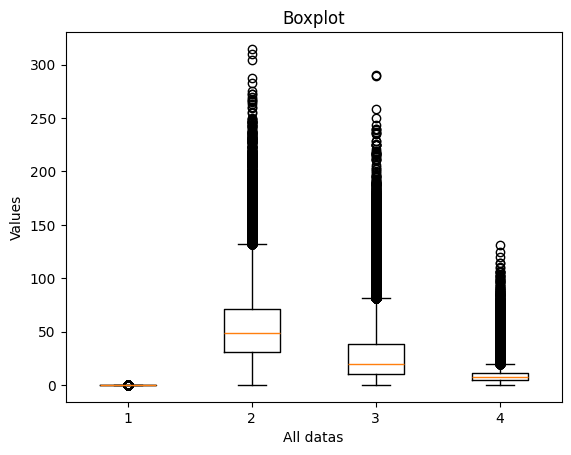

In [37]:
import matplotlib.pyplot as plt


plt.boxplot(pza_esp_cleaned)


plt.title('Boxplot')
plt.xlabel('All datas')
plt.ylabel('Values')

plt.show()

I can see some outliers, but as it's real life data, I'll let them and deal with

I'm using this model to complete my datas but I could have chosen another one. But let's try this one first.

In [38]:
pza_esp_cleaned.isnull().sum()

CO      0
NO_2    0
PM10    0
SO_2    0
dtype: int64

In [39]:
pza_esp_cleaned

,CO,NO_2,PM10,SO_2
date,,,,
2001-08-01 01:00:00,0.00047,69.790001,69.779999,6.46
2001-08-01 02:00:00,0.00033,64.110001,47.509998,6.41
2001-08-01 03:00:00,0.00027,60.349998,42.110001,5.88
2001-08-01 04:00:00,0.00021,48.689999,27.250000,5.29
2001-08-01 05:00:00,0.00018,46.189999,31.520000,5.31
...,...,...,...,...
2018-01-31 20:00:00,0.00130,118.000000,64.879997,10.00
2018-01-31 21:00:00,0.00130,127.000000,95.449997,12.00
2018-01-31 22:00:00,0.00140,126.000000,63.570000,13.00


# Sub calcul

In [40]:
# PM10 Sub-Index calculation
def get_PM10_subindex(x):
    if x <= 50:
        return x
    elif x <= 100:
        return x
    elif x <= 250:
        return 100 + (x - 100) * 100 / 150
    elif x <= 350:
        return 200 + (x - 250)
    elif x <= 430:
        return 300 + (x - 350) * 100 / 80
    elif x > 430:
        return 400 + (x - 430) * 100 / 80
    else:
        return 0

In [41]:
# SO2 Sub-Index calculation
def get_SO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 380:
        return 100 + (x - 80) * 100 / 300
    elif x <= 800:
        return 200 + (x - 380) * 100 / 420
    elif x <= 1600:
        return 300 + (x - 800) * 100 / 800
    elif x > 1600:
        return 400 + (x - 1600) * 100 / 800
    else:
        return 0

In [42]:
# CO Sub-Index calculation
def get_CO_subindex(x):
    if x <= 1:
        return x * 50 / 1
    elif x <= 2:
        return 50 + (x - 1) * 50 / 1
    elif x <= 10:
        return 100 + (x - 2) * 100 / 8
    elif x <= 17:
        return 200 + (x - 10) * 100 / 7
    elif x <= 34:
        return 300 + (x - 17) * 100 / 17
    elif x > 34:
        return 400 + (x - 34) * 100 / 17
    else:
        return 0

In [43]:
# NO2 Sub-Index calculation
def get_NO2_subindex(x):
    if x <= 40:
        return x * 50 / 40
    elif x <= 80:
        return 50 + (x - 40) * 50 / 40
    elif x <= 180:
        return 100 + (x - 80) * 100 / 100
    elif x <= 280:
        return 200 + (x - 180) * 100 / 100
    elif x <= 400:
        return 300 + (x - 280) * 100 / 120
    elif x > 400:
        return 400 + (x - 400) * 100 / 120
    else:
        return 0

In [44]:
pza_esp_cleaned["PM10_24hr_avg"] = pza_esp_cleaned["PM10"].rolling(window=24, min_periods=1).mean()
pza_esp_cleaned["PM10_SubIndex"] = pza_esp_cleaned["PM10_24hr_avg"].apply(get_PM10_subindex)

In [45]:
pza_esp_cleaned["SO2_24hr_avg"] = pza_esp_cleaned["SO_2"].rolling(window=24, min_periods=1).mean()
pza_esp_cleaned["SO2_SubIndex"] = pza_esp_cleaned["SO2_24hr_avg"].apply(get_SO2_subindex)

In [46]:
pza_esp_cleaned["NO2_24hr_avg"] = pza_esp_cleaned["NO_2"].rolling(window=24, min_periods=1).mean()
pza_esp_cleaned["NO2_SubIndex"] = pza_esp_cleaned["NO2_24hr_avg"].apply(get_NO2_subindex)

In [47]:
pza_esp_cleaned["CO_8hr_avg"] = pza_esp_cleaned["CO"].rolling(window=8, min_periods=1).mean()
pza_esp_cleaned["CO_SubIndex"] = pza_esp_cleaned["CO_8hr_avg"].apply(get_CO_subindex)

In [48]:
pza_esp_cleaned["aqi"] = round(pza_esp_cleaned[["PM10_SubIndex","SO2_SubIndex","NO2_SubIndex", "CO_SubIndex"]].max(axis = 1))

In [49]:
pza_esp_cleaned

,CO,NO_2,PM10,SO_2,PM10_24hr_avg,PM10_SubIndex,SO2_24hr_avg,SO2_SubIndex,NO2_24hr_avg,NO2_SubIndex,CO_8hr_avg,CO_SubIndex,aqi
date,,,,,,,,,,,,,
2001-08-01 01:00:00,0.00047,69.790001,69.779999,6.46,69.779999,69.779999,6.460000,8.075000,69.790001,87.237501,0.000470,0.023500,87.0
2001-08-01 02:00:00,0.00033,64.110001,47.509998,6.41,58.644999,58.644999,6.435000,8.043750,66.950001,83.687501,0.000400,0.020000,84.0
2001-08-01 03:00:00,0.00027,60.349998,42.110001,5.88,53.133333,53.133333,6.250000,7.812500,64.750000,80.937500,0.000357,0.017833,81.0
2001-08-01 04:00:00,0.00021,48.689999,27.250000,5.29,46.662499,46.662499,6.010000,7.512500,60.735000,75.918750,0.000320,0.016000,76.0
2001-08-01 05:00:00,0.00018,46.189999,31.520000,5.31,43.634000,43.634000,5.870000,7.337500,57.825999,72.282499,0.000292,0.014600,72.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-01-31 20:00:00,0.00130,118.000000,64.879997,10.00,44.928750,44.928750,6.000000,7.500000,71.416667,89.270833,0.000712,0.035625,89.0
2018-01-31 21:00:00,0.00130,127.000000,95.449997,12.00,45.710416,45.710416,5.958333,7.447917,71.250000,89.062500,0.000762,0.038125,89.0
2018-01-31 22:00:00,0.00140,126.000000,63.570000,13.00,47.201666,47.201666,6.083333,7.604167,72.083333,90.104167,0.000862,0.043125,90.0


In [50]:
final_pza_esp = pza_esp_cleaned[['CO', 'SO_2', 'PM10', 'NO_2', 'aqi']].copy()

Final dataset

In [51]:
final_pza_esp

,CO,SO_2,PM10,NO_2,aqi
date,,,,,
2001-08-01 01:00:00,0.00047,6.46,69.779999,69.790001,87.0
2001-08-01 02:00:00,0.00033,6.41,47.509998,64.110001,84.0
2001-08-01 03:00:00,0.00027,5.88,42.110001,60.349998,81.0
2001-08-01 04:00:00,0.00021,5.29,27.250000,48.689999,76.0
2001-08-01 05:00:00,0.00018,5.31,31.520000,46.189999,72.0
...,...,...,...,...,...
2018-01-31 20:00:00,0.00130,10.00,64.879997,118.000000,89.0
2018-01-31 21:00:00,0.00130,12.00,95.449997,127.000000,89.0
2018-01-31 22:00:00,0.00140,13.00,63.570000,126.000000,90.0


In [52]:
final_pza_esp.isnull().sum()

CO      0
SO_2    0
PM10    0
NO_2    0
aqi     0
dtype: int64

In [53]:
# Resample in weeks
pza_esp_weekly = final_pza_esp.resample('W').mean()

print(pza_esp_weekly)

                  CO       SO_2       PM10       NO_2        aqi
date                                                            
2001-01-07  0.000640  17.375988  15.234611  58.694910  77.712575
2001-01-14  0.001299  32.033512  29.907798  66.440833  82.476190
2001-01-21  0.001062  24.396071  24.484226  59.416191  74.541667
2001-01-28  0.000660  17.782857  15.269762  53.875655  69.464286
2001-02-04  0.001674  39.571607  39.877560  61.740595  78.886905
...              ...        ...        ...        ...        ...
2018-04-08  0.000376   2.386905  34.617679  35.916667  48.392857
2018-04-15  0.000350   1.869583  34.299345  30.627976  38.684524
2018-04-22  0.000406   2.345238  38.900655  41.839286  51.839286
2018-04-29  0.000365   2.095238  37.603393  37.267857  53.940476
2018-05-06  0.000296   1.640000  24.916000  23.160000  25.920000

[905 rows x 5 columns]


I group by week because I would like to predict values for the next 2 years (the 100 next values)

(<Figure size 1600x400 with 1 Axes>,
 <Axes: xlabel='Date', ylabel='Air_quality'>)

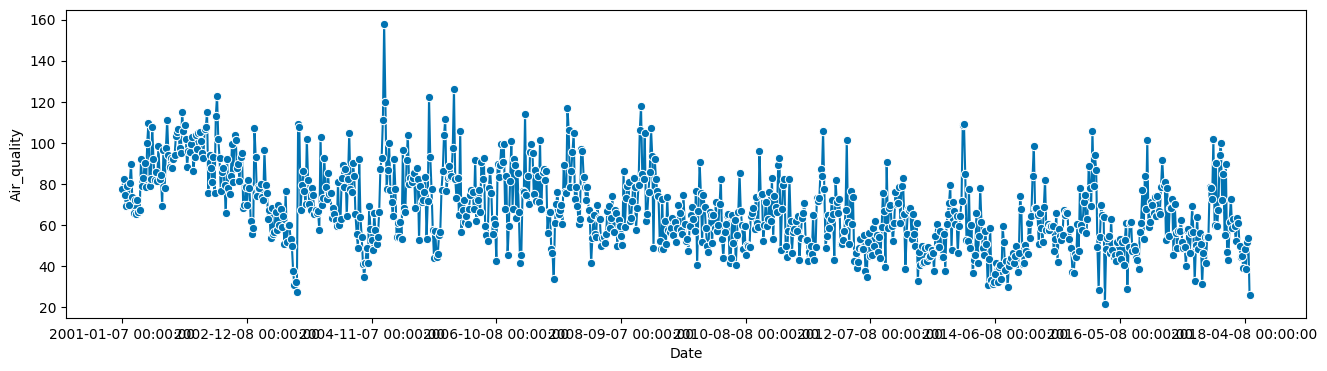

In [54]:
from sktime.utils.plotting import plot_series
plot_series(pza_esp_weekly['aqi'], x_label = 'Date', y_label = 'Air_quality')

Okay so here is the air quality of Madrid from 2001 to 2018

# Prepare train data and test data

In [53]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

train_data = pza_esp_weekly.iloc[:-108] 
test_data = pza_esp_weekly.iloc[-108:]   #I keep the last 2 years for the test

In [54]:
train_data.shape

(797, 5)

In [55]:
test_data.shape

(108, 5)

# ARIMA

I look here for the best ARIMA parameters

In [70]:
import itertools

p_values = range(0, 8)
d_values = range(0, 5)
q_values = range(0, 8)

rmse_scores = []


for p, d, q in itertools.product(p_values, d_values, q_values):
    try:

        model = ARIMA(train_data['aqi'], order=(p, d, q))
        model_fit = model.fit()

        start = len(train_data['aqi'])
        end = len(train_data['aqi']) + len(test_data['aqi']) - 1


        predictions = model_fit.predict(start, end)


        mse = mean_squared_error(test_data['aqi'], predictions)
        rmse = mse ** 0.5


        rmse_scores.append((rmse, (p, d, q)))
    except:
        continue


best_rmse, best_params = min(rmse_scores)
print("Meilleurs paramètres:", best_params)
print("Meilleur RMSE:", best_rmse)

c:\Users\anton\OneDrive\Documents\GitHub\Capgemini_prueba_2\.venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\anton\OneDrive\Documents\GitHub\Capgemini_prueba_2\.venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\anton\OneDrive\Documents\GitHub\Capgemini_prueba_2\.venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\anton\OneDrive\Documents\GitHub\Capgemini_prueba_2\.venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA paramete

Meilleurs paramètres: (6, 0, 4)
Meilleur RMSE: 14.828969802954461


c:\Users\anton\OneDrive\Documents\GitHub\Capgemini_prueba_2\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


The model doesn't work at all with 6,0,4

In [125]:
#I tried to fine tune it and try severals parameters
model = ARIMA(train_data['aqi'], order=(54, 1, 10))
model_fit = model.fit()
model_fit.summary()

c:\Users\anton\OneDrive\Documents\GitHub\Capgemini_prueba_2\.venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\anton\OneDrive\Documents\GitHub\Capgemini_prueba_2\.venv\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\anton\OneDrive\Documents\GitHub\Capgemini_prueba_2\.venv\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    aqi   No. Observations:                  797
Model:               ARIMA(54, 1, 10)   Log Likelihood               -3192.654
Date:                Fri, 10 May 2024   AIC                           6515.309
Time:                        17:49:48   BIC                           6819.483
Sample:                    01-07-2001   HQIC                          6632.186
                         - 04-10-2016                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2404      0.311     -0.773      0.440      -0.850       0.370
ar.L2         -0.4884      0.290     -1.682      0.093      -1.058       0.081
ar.L3         -0.5587      0.168     -3.330      0.001      -0.888      -0.230
ar.L4         -0.6088      0.233     -2.617      0.009      -1.065      -0.153
ar.L5         -0.3468      0.247     -1.405      0.160      -0.831       0.137
ar.L6         -0.4138      0.218     -1.902      0.057      -0.840       0.013
ar.L7         -0.9913      0.215     -4.607      0.000      -1.413      -0.570
ar.L8         -0.2864      0.348     -0.822      0.411      -0.969       0.396
ar.L9         -0.6363      0.304     -2.091      0.037      -1.233      -0.040
ar.L10        -0.4835      0.260     -1.858      0.063      -0.994       0.027
ar.L11        -0.4675      0.190     -2.465      0.014      -0.839      -0.096
ar.L12        -0.3981      0.182     -2.191      0.028      -0.754      -0.042
ar.L13        -0.4396      0.156     -2.825      0.005      -0.745      -0.135
ar.L14        -0.4302      0.163     -2.646      0.008      -0.749      -0.112
ar.L15        -0.4166      0.158     -2.644      0.008      -0.725      -0.108
ar.L16        -0.4847      0.150     -3.237      0.001      -0.778      -0.191
ar.L17        -0.3973      0.157     -2.526      0.012      -0.706      -0.089
ar.L18        -0.3865      0.146     -2.640      0.008      -0.674      -0.100
ar.L19        -0.3685      0.149     -2.467      0.014      -0.661      -0.076
ar.L20        -0.3683      0.143     -2.566      0.010      -0.650      -0.087
ar.L21        -0.3349      0.148     -2.261      0.024      -0.625      -0.045
ar.L22        -0.3820      0.136     -2.815      0.005      -0.648      -0.116
ar.L23        -0.3526      0.144     -2.453      0.014      -0.634      -0.071
ar.L24        -0.3710      0.138     -2.696      0.007      -0.641      -0.101
ar.L25        -0.3133      0.133     -2.350      0.019      -0.575      -0.052
ar.L26        -0.3634      0.128     -2.837      0.005      -0.614      -0.112
ar.L27        -0.2680      0.127     -2.112      0.035      -0.517      -0.019
ar.L28        -0.3466      0.126     -2.745      0.006      -0.594      -0.099
ar.L29        -0.3295      0.125     -2.642      0.008      -0.574      -0.085
ar.L30        -0.3456      0.126     -2.735      0.006      -0.593      -0.098
ar.L31        -0.3687      0.128     -2.887      0.004      -0.619      -0.118
ar.L32        -0.2485      0.132     -1.886      0.059      -0.507       0.010
ar.L33        -0.3250      0.122     -2.665      0.008      -0.564      -0.086
ar.L34        -0.2840      0.130     -2.189      0.029      -0.538      -0.030
ar.L35        -0.2220      0.126     -1.758      0.079      -0.469       0.025
ar.L36        -0.2866      0.114     -2.510      0.012      -0.510      -0.063
ar.L37        -0.2749      0.113     -2.426      0.015      -0.497      -0.053
ar.L38        -0.3306      0.115     -2.874      0.004      -0.556      -0.105
ar

In [126]:
start = len(train_data['aqi'])
end = len(train_data['aqi']) + len(test_data['aqi']) - 1

#Predictions
predictions = model_fit.predict(start, end)

mse = mean_squared_error(test_data['aqi'], predictions)
rmse = mse ** 0.5

print(rmse)

14.445266004882267


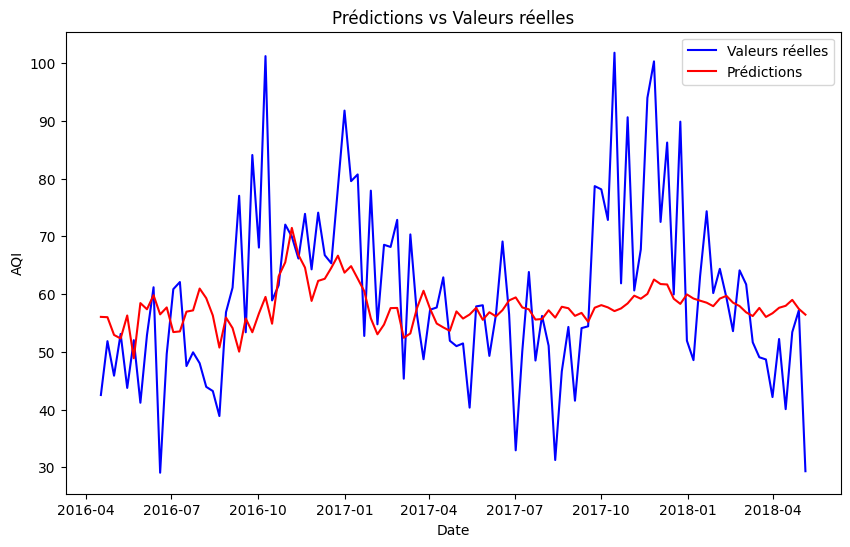

In [127]:
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data['aqi'], label='Valeurs réelles', color='blue')
plt.plot(test_data.index, predictions, label='Prédictions', color='red')
plt.title('Prédictions vs Valeurs réelles')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend()
plt.show()

After several test, this model doesn't look really appropriated

# Auto ARIMA

I can't run this with my actual computation power, it takes too many times

In [59]:
from pmdarima import auto_arima
setwise_fit = auto_arima(pza_esp_weekly['aqi'], start_p=0, max_p=5, d=1, max_d=5, start_q=0, max_q=5, start_P=0, max_P=5, D=1, max_D=5, start_Q=0, max_Q=5, 
                         m=54, seasonal=True,error_action='warn',trace=True, suppress_warnings=True, stepwise=True, random_state=True,n_fits=50)
setwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[54]             : AIC=7790.239, Time=0.42 sec
 ARIMA(1,1,0)(1,1,0)[54]             : AIC=7472.719, Time=15.86 sec
 ARIMA(0,1,1)(0,1,1)[54]             : AIC=inf, Time=99.52 sec
 ARIMA(1,1,0)(0,1,0)[54]             : AIC=7673.577, Time=0.77 sec


KeyboardInterrupt: 

In [ ]:
start = len(train_data['aqi'])
end = len(train_data['aqi']) + len(test_data['aqi']) - 1

predictions = model_fit.predict(start, end)

mse = mean_squared_error(test_data['aqi'], predictions)
rmse = mse ** 0.5

print(rmse)

In [ ]:
print(r2_score(test_data['aqi'], predictions))

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(test_data.index, test_data['aqi'], label='True values', color='blue')
plt.plot(test_data.index, predictions, label='Predictions', color='red')
plt.title('Predictions vs True values')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.legend()
plt.show()

Let's try another model

# LSTM

In [55]:
import numpy as np
def df_to_X_y(df, window_size=4):
  df_as_np = df.to_numpy()
  X = []
  y = []
  for i in range(len(df_as_np)-window_size):
    row = [[a] for a in df_as_np[i:i+window_size]]
    X.append(row)
    label = df_as_np[i+window_size]
    y.append(label)
  return np.array(X), np.array(y)

The goal is to create X with the values on 52 weeks for example [1,2,3,4],... and in Y I put he value of the 53th week

In [56]:
WINDOW_SIZE = 52
X1, y1 = df_to_X_y(pza_esp_weekly['aqi'], WINDOW_SIZE)
X1.shape, y1.shape

((853, 52, 1), (853,))

In [64]:
X_train, y_train = X1[:753], y1[:753]
X_test, y_test = X1[753:], y1[753:]
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((753, 52, 1), (753,), (100, 52, 1), (100,))

In [68]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

model = Sequential()
model.add(InputLayer((52, 1)))
model.add(LSTM(32))
model.add(Dense(16, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='linear'))

model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 32)             │         4,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │             9 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,025 (19.63 KB)

 Trainable params: 5,025 (19.63 KB)

 Non-trainable params: 0 (0.00 B)

In [69]:
cp = ModelCheckpoint('model_LSTM.keras', save_best_only=True)
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.0001), metrics=[RootMeanSquaredError()])

Epoch 1/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 4882.7412 - root_mean_squared_error: 69.8663
Epoch 2/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 4769.9507 - root_mean_squared_error: 69.0532
Epoch 3/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5062.7002 - root_mean_squared_error: 71.1241
Epoch 4/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4777.8237 - root_mean_squared_error: 69.1184
Epoch 5/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4762.0244 - root_mean_squared_error: 69.0018
Epoch 6/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4756.7720 - root_mean_squared_error: 68.9684
Epoch 7/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4701.5513 - root_mean_squared_error: 68.5664
Epoch 8/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 4710.6196 - root_mean_squared_error: 68.6310
Epoch 9/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 4750.3389 - root_mean_squared_error: 68.9179
Epoch 10/200
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - 

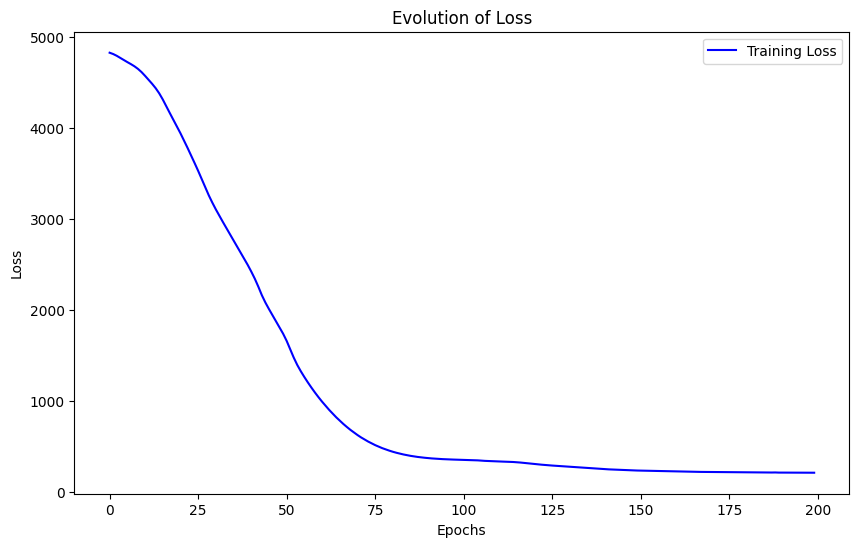

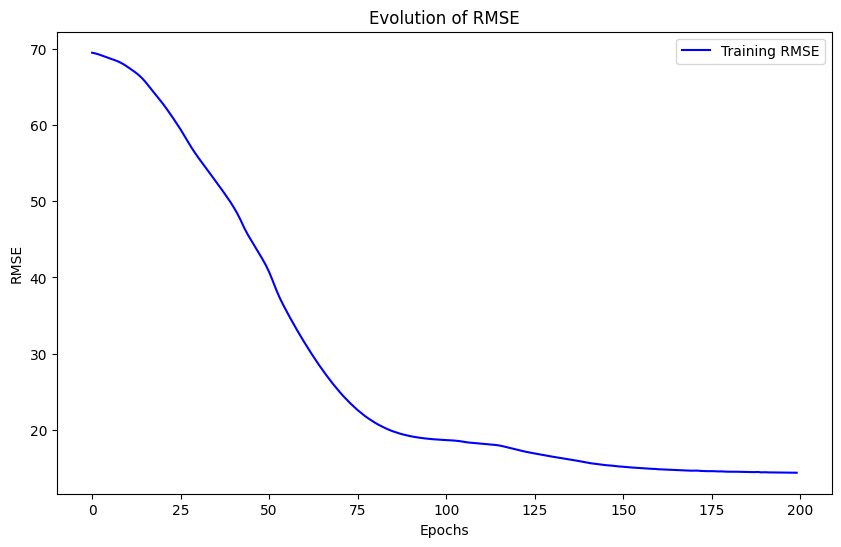

In [70]:
#Train model
history = model.fit(X_train, y_train, epochs=200, callbacks=[cp])

# Save metrics
train_loss = history.history['loss']
train_rmse = history.history['root_mean_squared_error']

plt.figure(figsize=(10, 6))
plt.plot(train_loss, label='Training Loss', color='blue')
plt.title('Evolution of Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(train_rmse, label='Training RMSE', color='blue')
plt.title('Evolution of RMSE')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
plt.show()

In [71]:
train_predictions = model.predict(X_train).flatten()
train_results = pd.DataFrame(data={'Train Predictions':train_predictions, 'Actuals':y_train})
train_results

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


,Train Predictions,Actuals
0,84.971550,88.386905
1,82.735634,96.011905
2,84.061279,95.440476
3,84.015907,99.291667
4,84.591812,102.767857
...,...,...
748,51.443565,53.101190
749,54.759377,43.785714
750,50.436459,52.017857
751,54.165634,40.851190


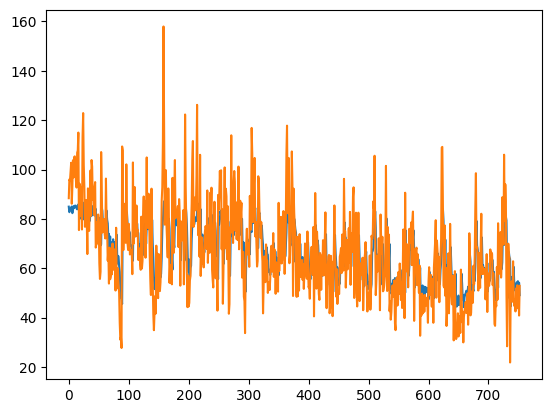

In [75]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'])
plt.plot(train_results['Actuals'])

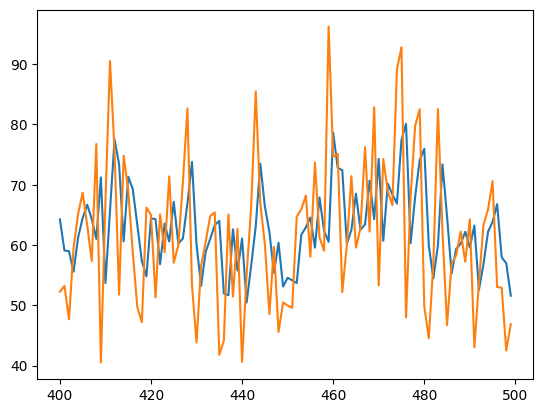

In [76]:
import matplotlib.pyplot as plt
plt.plot(train_results['Train Predictions'][400:500])
plt.plot(train_results['Actuals'][400:500])

It looks like LSTM works well

In [96]:
X_test.shape

(100, 52, 1)

In [79]:
test_predictions = model.predict(X_test).flatten()
test_results = pd.DataFrame(data={'Test Predictions':test_predictions, 'Actuals':y_test})
test_results

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


,Test Predictions,Actuals
0,54.551189,61.184524
1,59.134579,29.059524
2,45.031006,49.363095
3,52.716614,60.857143
4,59.011787,61.791667
...,...,...
95,48.680130,48.392857
96,52.530697,38.684524
97,48.158985,51.839286
98,54.007973,53.940476


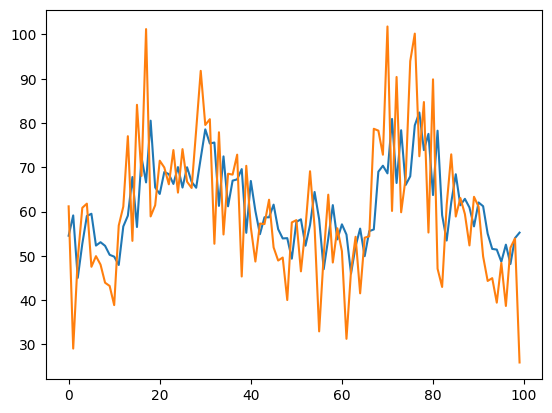

In [80]:
plt.plot(test_results['Test Predictions'])
plt.plot(test_results['Actuals'])

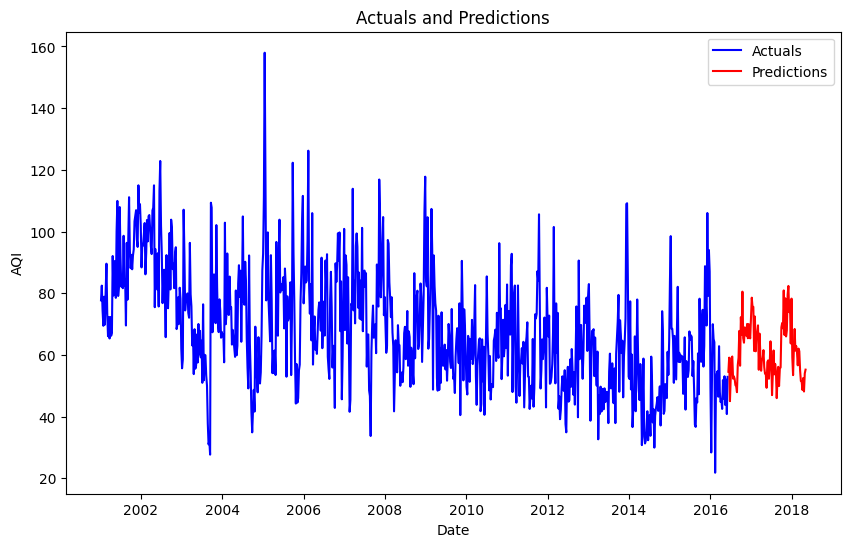

In [84]:
plt.figure(figsize=(10, 6))
plt.plot(pza_esp_weekly[:-100].index, pza_esp_weekly['aqi'][:-100], label='Actuals', color='blue')
plt.plot(pza_esp_weekly[-100:].index, test_results['Test Predictions'], label='Predictions', color='red')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.title('Actuals and Predictions')
plt.legend()
plt.show()

I'm satisfied by LSTM, I would need to fine tune the model for it to fit better but I don't have time to do it this week

# Now with the future

In [188]:
# I prepare the data
pza_esp_weekly_X,pza_esp_weekly_y = df_to_X_y(pza_esp_weekly['aqi'], window_size=52)

In [189]:
results = []
last_sequence = pza_esp_weekly_X[-1]

for i in range(1, 101):
    
    x_input = last_sequence.reshape(1,52,1)
    
    next_pred = model.predict(x_input).flatten()
    
    results.append(next_pred[-1])
    last_sequence = np.append(last_sequence[1:], next_pred[-1])


# Créer un index pour les prédictions futures
future_index = pd.date_range(start='2018-05-13', periods=100, freq='W')

results = pd.DataFrame(data={'Predictions':results}, index=future_index)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━

In [190]:
results

,Predictions
2018-05-13,55.247063
2018-05-20,55.842567
2018-05-27,56.265209
2018-06-03,56.570061
2018-06-10,56.825054
...,...
2020-03-08,71.704430
2020-03-15,71.923569
2020-03-22,72.141632
2020-03-29,72.358040


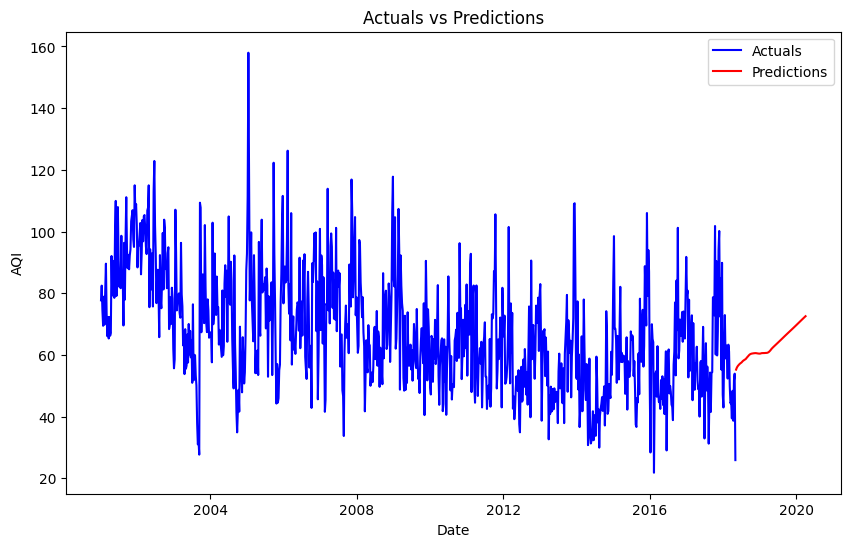

In [192]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(pza_esp_weekly.index, pza_esp_weekly['aqi'], label='Actuals', color='blue')
plt.plot(results.index, results['Predictions'], label='Predictions', color='red')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.title('Actuals vs Predictions')
plt.legend()
plt.show()

It looks like the predictions of the next 100 values doesn't go as I was expecting

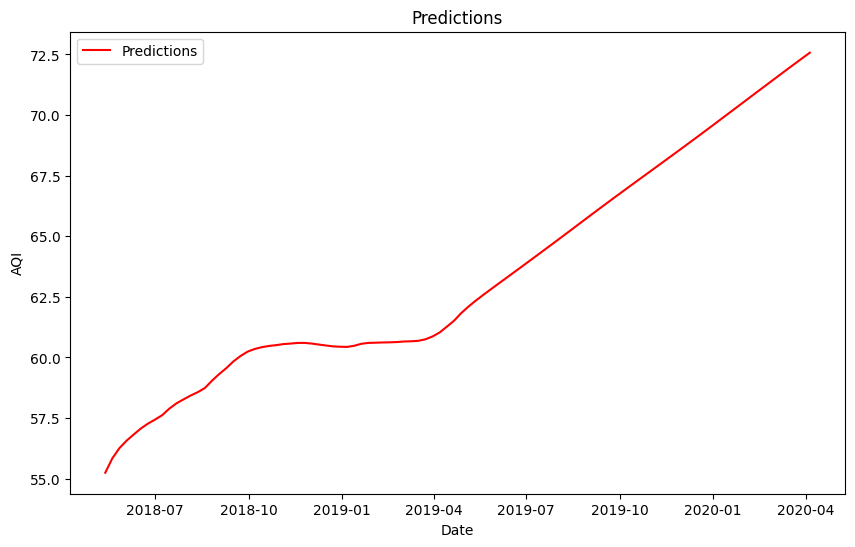

In [187]:
plt.figure(figsize=(10, 6))
plt.plot(results.index, results['Test Predictions'], label='Predictions', color='red')
plt.xlabel('Date')
plt.ylabel('AQI')
plt.title('Predictions')
plt.legend()
plt.show()

The method of values production is not good, maybe I've to change my model for it to understand better the relation between past and the value to predict. But I don't have time to continue this study this week

In [194]:
#Save_model
model.save("LSTM_air_quality.keras")

# Conclusion

It was my first project with time series, I think my model is not that bad but my prediction of the next 100 values are not as I was expecting. I would need more time to see how to make this project more robust but unfortunately I don't have time for now and I want to send this test this week because next week I'll have no time.

I'm sure that I can improve myself, and I'm sure that working with you is going to make me a better Data Scientist. It's for me the best enter point I could have in datas